# Posttest KB 5: Pendekatan Mechine Learning

* Import Library yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

* Membaca dataset

In [2]:
dataset_split = pd.read_csv('Forbes Top2000 2017.csv')
dataset_split.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


* Melihat apakah ada data null atau duplikat

In [3]:
dataset_split.isna().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

dataset_split = pd.read_csv('Forbes Top2000 2017.csv')

print(dataset_split.columns)

print(dataset_split['Sector'].dtype)
print(dataset_split['Industry'].dtype)

simpleImputerObjek = SimpleImputer(strategy='most_frequent')
dataset_split.loc[:, 'Sector'] = simpleImputerObjek.fit_transform(dataset_split[['Sector']])
dataset_split.loc[:, 'Industry'] = simpleImputerObjek.fit_transform(dataset_split[['Industry']])

print(dataset_split.isnull().sum())


Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry'],
      dtype='object')
object
object
Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64


In [5]:
# Cek nilai duplikat
dataset_split[dataset_split.duplicated()]

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry


## Supervised Learning

* Support Vector Classifier (SVM) dengan Mengambil 2 fitur untuk Binary Classification

In [6]:
X = dataset_split[['Sales', 'Profits']]
y = dataset_split['Sector']

* Membagi data (split) ke train set dan test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Membuat objek classifier SVM

In [8]:
svm = SVC(kernel="rbf")

* Melatih classifier dengan data train

In [9]:
svm.fit(X_train, y_train)

SVC()

* Melakukan prediksi data test

In [10]:
y_pred = svm.predict(X_test)

* Menyimpan nilai support vectors dan indeks

In [11]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

###### Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, dan grafik decision boundary

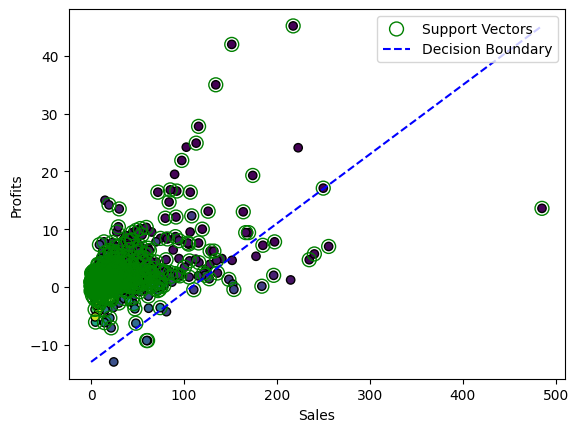

In [12]:
plt.scatter(dataset_split['Sales'], dataset_split['Profits'], c=range(len(dataset_split)), cmap='viridis', edgecolors='k', marker='o')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='g', label='Support Vectors')

plt.xlabel('Sales')
plt.ylabel('Profits')
plt.legend(loc='upper right')

X_line = np.linspace(min(dataset_split['Sales']), max(dataset_split['Sales']), 100)
y_line = np.linspace(min(dataset_split['Profits']), max(dataset_split['Profits']), 100)
plt.plot(X_line, y_line, linestyle='--', color='blue', label='Decision Boundary')

plt.xlabel('Sales')
plt.ylabel('Profits')
plt.legend(loc='upper right')

plt.show()


* Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [13]:
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

                            precision    recall  f1-score   support

    Consumer Discretionary       0.20      0.02      0.03        65
          Consumer Staples       1.00      0.00      0.00        37
                    Energy       1.00      0.02      0.05        41
                Financials       0.40      0.99      0.56       238
               Health Care       1.00      0.00      0.00        22
               Industrials       1.00      0.00      0.00        63
    Information Technology       1.00      0.00      0.00        42
                 Materials       1.00      0.00      0.00        52
Telecommunication Services       1.00      0.00      0.00        14
                 Utilities       1.00      0.00      0.00        26

                  accuracy                           0.40       600
                 macro avg       0.86      0.10      0.06       600
              weighted avg       0.67      0.40      0.23       600



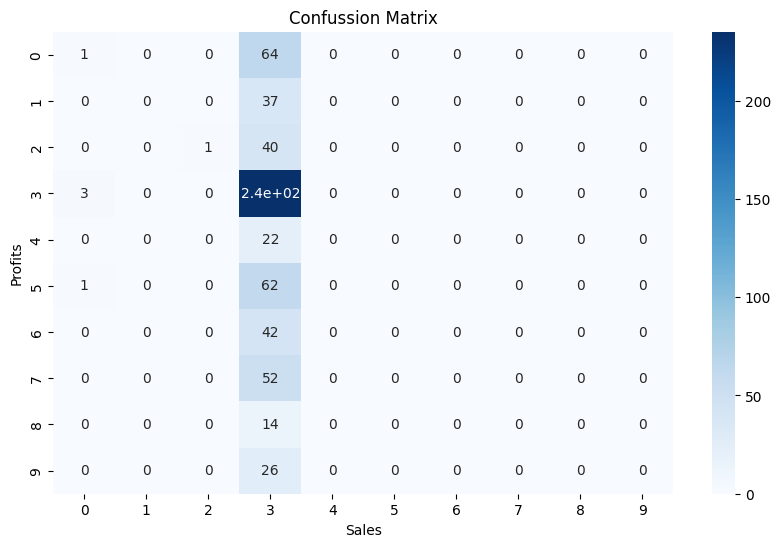

In [16]:
from sklearn.metrics import confusion_matrix as cm

conmat = cm(y_test, y_pred)

# Visualisasikan Menggunakan Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(conmat, annot=True, cmap='Blues')
plt.xlabel("Sales")
plt.ylabel("Profits")
plt.title("Confussion Matrix")
plt.show()

## Linear Regression

In [17]:
X, y = dataset_split[['Sales']], dataset_split['Profits']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Membuat model regresi linear untuk membuat prediksi pada data test

In [19]:
lir = LinearRegression()
lir.fit(X_train, y_train)

y_pred = lir.predict(X_test)

* Visualisasi hasil prediksi regresi linear pada data test 

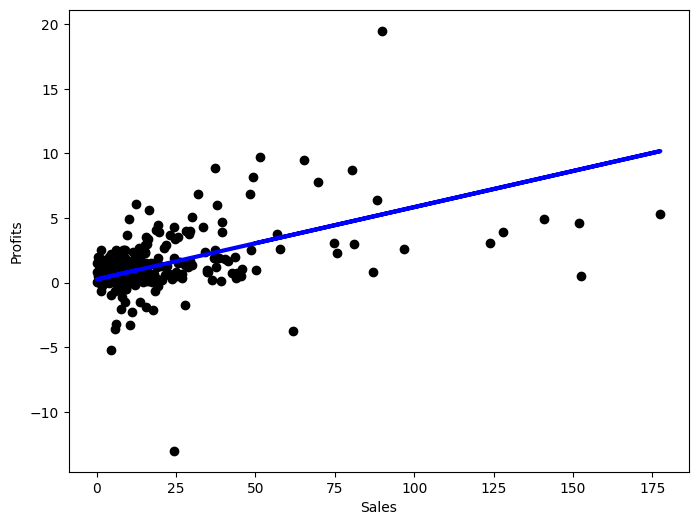

In [20]:
plt.figure(figsize=(8,6))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Sales")
plt.ylabel("Profits")
plt.show()

* Membuat objek classifier SVR

In [27]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # Membuat model SVM
svm.fit(X_train, y_train) # Melatih Model dengan Train Set

SVR(kernel='linear')

In [28]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 0.9321950199890112
MSE : 3.4360923812928106
RMSE : 1.8536699763692595
R-Squared : 0.1845630186482694


## Unsupervised Learning

### K-Means

* Menggunakan fitur X dan menentukan banyaknya kelompok

In [29]:
X = dataset_split[["Sales", "Profits"]]
K = 2

* Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [30]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

* Membuat label dan kolom prediksi dari model

In [31]:
cluster_labels = kmeans.labels_
dataset_split["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

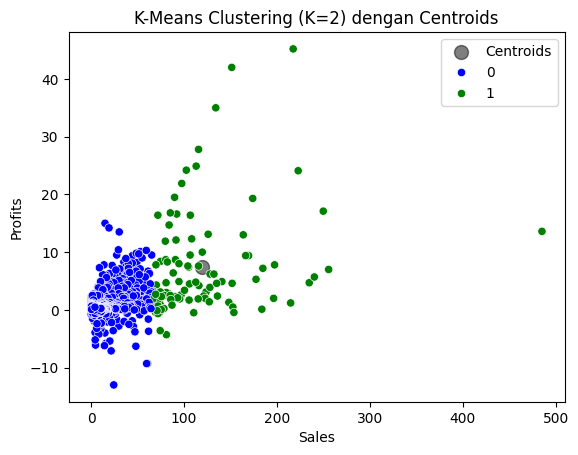

In [35]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=dataset_split, x="Sales", y="Profits", hue="cluster", palette=["blue", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Sales")
plt.ylabel("Profits")
plt.legend()
plt.show()

* Membandingkan cluster labels dengan true labels

In [37]:
cross_tab = pd.crosstab(dataset_split["cluster"], dataset_split["Sector"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Sector   Consumer Discretionary  Consumer Staples  Energy  Financials  \
cluster                                                                 
0                           216               111      95         751   
1                            21                 4      15          29   

Sector   Health Care  Industrials  Information Technology  Materials  \
cluster                                                                
0                 85          201                     123        173   
1                  6            8                       7          1   

Sector   Telecommunication Services  Utilities  
cluster                                         
0                                47         99  
1                                 6          2   



* Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)"

In [38]:
ari = adjusted_rand_score(dataset_split["Sector"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.01


* Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)"

In [40]:
true_labels_num = dataset_split["Sector"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.01


* Homogeneity, Completeness dan V-Measure

In [42]:
homogeneity = homogeneity_score(dataset_split["Sector"], cluster_labels)
completeness = completeness_score(dataset_split["Sector"], cluster_labels)
v_measure = v_measure_score(dataset_split["Sector"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.01
Completeness Score: 0.05
V-Measure Score: 0.01
